In [77]:
from junifer.storage import HDF5FeatureStorage
import numpy as np
import matplotlib.pyplot as plt

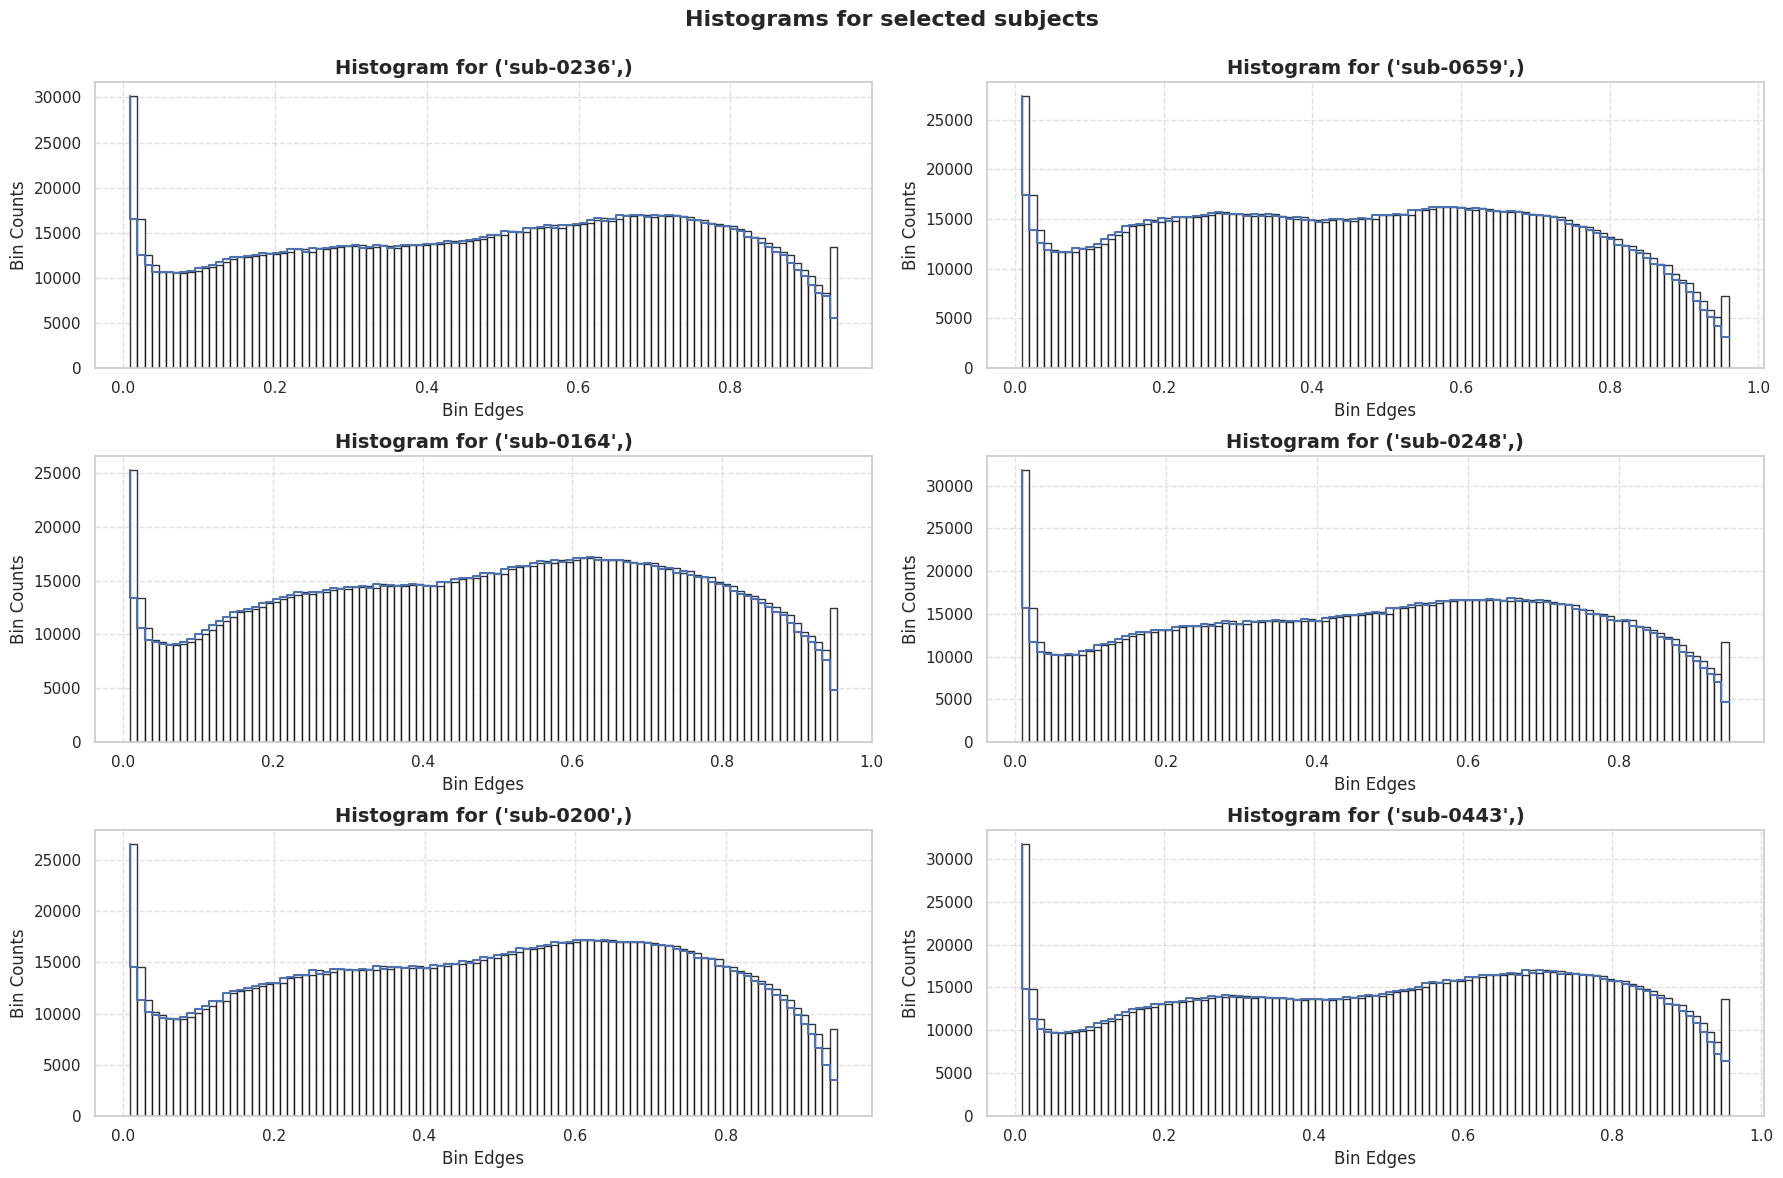

In [81]:
def plot_histogram_data(path_to_file: str) -> None:
    # Load the storage
    storage = HDF5FeatureStorage(uri=path_to_file)
    
    # Read the dataframes
    histogram_counts_df = storage.read_df('VBM_GM_hist_hist')
    histograms_bins_df = storage.read_df('VBM_GM_hist_bin_edges')
    
    # Randomly select 6 rows from both dataframes
    random_indices = np.random.choice(histogram_counts_df.index, size=6, replace=False)
    selected_counts_df = histogram_counts_df.loc[random_indices]
    selected_bins_df = histograms_bins_df.loc[random_indices]
    
    # Create a 3x2 subplot
    fig, axes = plt.subplots(3, 2, figsize=(18, 12))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Plot each histogram in the subplot
    for i, idx in enumerate(random_indices):
        bin_counts = np.array(selected_counts_df.loc[idx]).reshape(100).astype(float)
        bin_edges = np.array(selected_bins_df.loc[idx][1:]).astype(float)
        
        # Color for each histogram
        
        # Plot histogram
        axes[i].hist(bin_edges, bins=bin_edges, weights=bin_counts,edgecolor='black', color='white', alpha=0.8)
        axes[i].step(bin_edges,bin_counts,color='b')
        axes[i].set_xlabel('Bin Edges', fontsize=12)
        axes[i].set_ylabel('Bin Counts', fontsize=12)
        axes[i].set_title(f'Histogram for {idx}', fontsize=14, fontweight='bold')
        axes[i].grid(True, linestyle='--', alpha=0.6)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Adjust top to make space for the main title
    plt.suptitle('Histograms for selected subjects', fontsize=16, fontweight='bold')
    plt.show()

# Example usage:
# plot_histogram_data('path_to_your_hdf5_file.h5')
plot_histogram_data('/home/hsreekri/Junifer_HistogramMarker/AOMICID1000_vbm_histogram.hdf5')

In [79]:
df = storage.read_df('VBM_GM_hist_hist')
bin_df = storage.read_df('VBM_GM_hist_bin_edges')

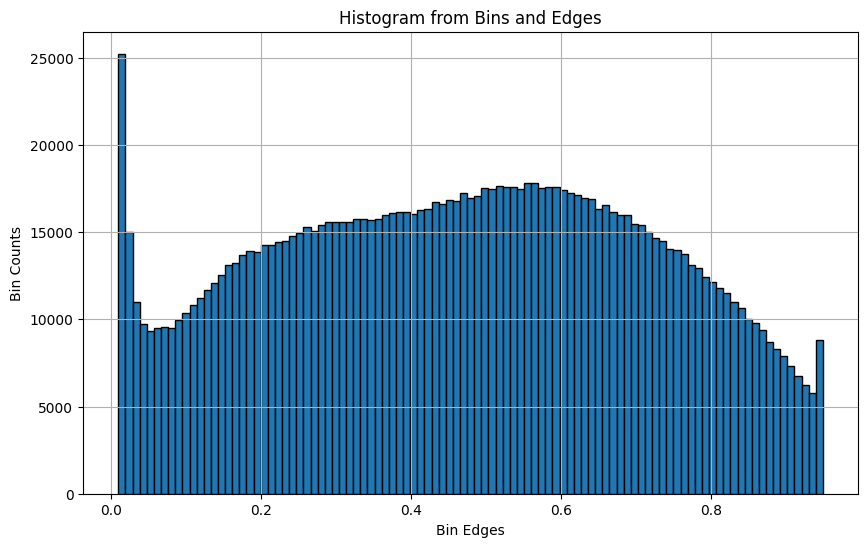

In [21]:
bin_counts = np.array(df.iloc[2]).reshape(100).astype(float)

bin_edges = np.array(bin_df.iloc[2][1:]).astype(float)


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(bin_edges, bins=bin_edges, weights=bin_counts, edgecolor='black')
plt.xlabel('Bin Edges')
plt.ylabel('Bin Counts')
plt.title('Histogram from Bins and Edges')
plt.grid(True)
plt.show()
